# MATH 210 Introduction to Mathematical Computing

## March 22, 2023

* Order of Accuracy

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Order of Accuracy

A numerical method is order $p$ if $E(h) = |y(t_1) - y_1| \leq Ch^{p+1}$ for any differential equation $y' = f(t,y)$, $y(t_0) = t_0$ (where $C$ depends on $f$ and $y_0$).

It is very difficult to prove a method is order $p$, therefore we apply the method to the simple equation $y' = y$, $y(0)=1$ and plot $\log E(H)$ versus $\log h$ and observe the slope $p+1$.

## Euler's Method

In [2]:
def odeEuler(f,t,y0):
    y = np.zeros(len(t))
    y[0] = y0
    for n in range(0,len(t)-1):
        h = t[n+1] - t[n]
        y[n+1] = y[n] + f(t[n],y[n])*h
    return y

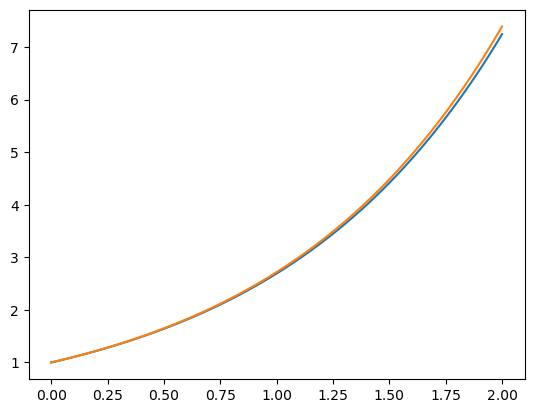

In [3]:
f = lambda t,y: y
y0 = 1
t = np.linspace(0,2,100)
y = odeEuler(f,t,y0)
plt.plot(t,y,t,np.exp(t))
plt.show()

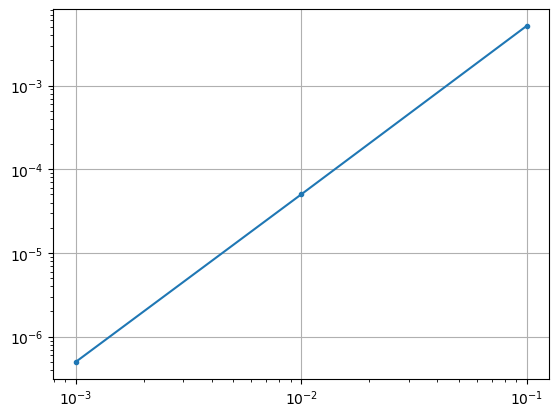

In [4]:
h = [0.1,0.01,0.001]
E = np.zeros(len(h))
for n in range(len(h)):
    y = odeEuler(f,[0,h[n]],y0)
    E[n] = np.abs(y[1] - np.exp(h[n]))
plt.loglog(h,E,'.-'), plt.grid(True)
plt.show()

Slope is 2 therefore we confirm that Euler's method is order 1.

## Midpoint Method

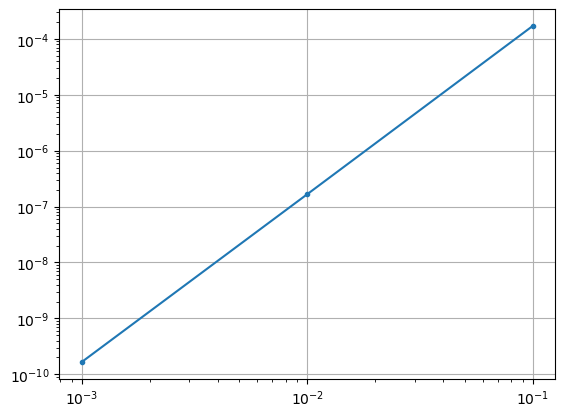

In [5]:
def odeMidpoint(f,t,y0):
    y = np.zeros(len(t))
    y[0] = y0
    for n in range(0,len(t)-1):
        h = t[n+1] - t[n]
        k1 = f(t[n],y[n])
        k2 = f(t[n] + h/2,y[n] + k1*h/2)
        y[n+1] = y[n] + k2*h
    return y

h = [0.1,0.01,0.001]
E = np.zeros(len(h))
for n in range(len(h)):
    y = odeMidpoint(f,[0,h[n]],y0)
    E[n] = np.abs(y[1] - np.exp(h[n]))
plt.loglog(h,E,'.-'), plt.grid(True)
plt.show()

Slope is 3 therefore we confirm midpoint method is order 2.

## Bad Method

Why does the midpoint method work? Why not take just 1/3 step instead of 1/2 step?

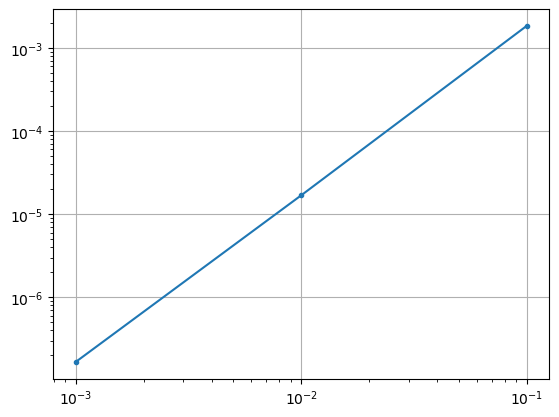

In [6]:
def odeThird(f,t,y0):
    y = np.zeros(len(t))
    y[0] = y0
    for n in range(0,len(t)-1):
        h = t[n+1] - t[n]
        k1 = f(t[n],y[n])
        k2 = f(t[n] + h/3,y[n] + k1*h/3)
        y[n+1] = y[n] + k2*h
    return y

h = [0.1,0.01,0.001]
E = np.zeros(len(h))
for n in range(len(h)):
    y = odeThird(f,[0,h[n]],y0)
    E[n] = np.abs(y[1] - np.exp(h[n]))
plt.loglog(h,E,'.-'), plt.grid(True)
plt.show()

Slope is 2 therefore this method is order 1. It's only as good as Euler's method even though it computes 2 slopes $k_1$ and $k_2$.

## Second Order RK Method

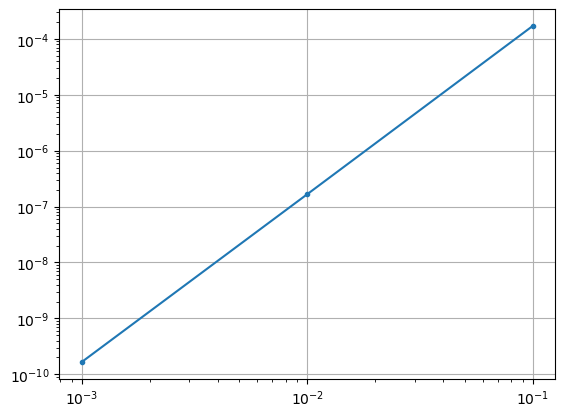

In [7]:
def odeMethod(f,t,y0):
    y = np.zeros(len(t))
    y[0] = y0
    for n in range(0,len(t)-1):
        h = t[n+1] - t[n]
        alpha = 0.1
        k1 = f(t[n],y[n])
        k2 = f(t[n] + alpha*h,y[n] + k1*alpha*h)
        y[n+1] = y[n] + ((1 - 1/2/alpha)*k1 + 1/2/alpha*k2)*h
    return y

h = [0.1,0.01,0.001]
E = np.zeros(len(h))
for n in range(len(h)):
    y = odeMethod(f,[0,h[n]],y0)
    E[n] = np.abs(y[1] - np.exp(h[n]))
plt.loglog(h,E,'.-'), plt.grid(True)
plt.show()

The slope is 3 therefore we confirm the method is order 2 for any $\alpha$.

## "The" Runge-Kutta Method

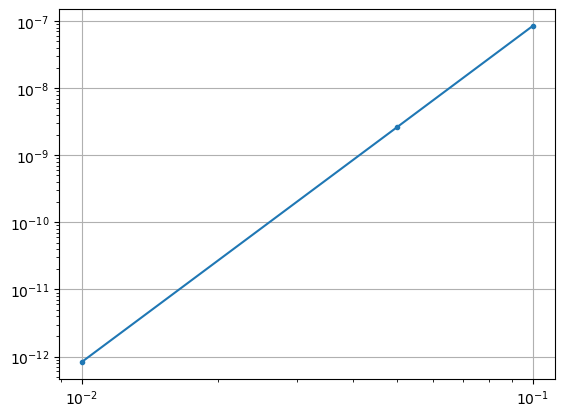

In [8]:
def odeRK4(f,t,y0):
    y = np.zeros(len(t))
    y[0] = y0
    for n in range(0,len(t)-1):
        h = t[n+1] - t[n]
        k1 = f(t[n],y[n])
        k2 = f(t[n] + h/2,y[n] + k1*h/2)
        k3 = f(t[n] + h/2,y[n] + k2*h/2)
        k4 = f(t[n] + h,y[n] + k3*h)
        y[n+1] = y[n] + (k1 + 2*k2 + 2*k3 + k4)/6*h
    return y

h = [0.1,0.05,0.01]
E = np.zeros(len(h))
for n in range(len(h)):
    y = odeRK4(f,[0,h[n]],y0)
    E[n] = np.abs(y[1] - np.exp(h[n]))
plt.loglog(h,E,'.-'), plt.grid(True)
plt.show()

Slope is 5 therefore we confirm the order of RK4 is 4.